<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/py24_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 미국 신생아 이름 데이터 셋

* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames
* 1880 ~ 2010 연도별 파일이 나눠져 있음.
* 이름, 성별, 신생아수
* 각 파일에는 '이름, 성별, 신생아수'가 comma로 구분되어 있음.

In [ ]:
file_1880='https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob1880.txt'

In [ ]:
yob1880 = pd.read_csv(file_1880)

In [ ]:
yob1880.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터 프레임의 컬럼 이름으로 간주.

파일에 컬럼 이름이 포함되어 있지 않ㄴ은 경우(파일 첫번째 줄부터 데이터가 시작되는 경우)에는 컬럼 이름들을 파라미터에 전달해야만 함.

In [ ]:
col_names=['name', 'gender', 'births']

In [ ]:
yob1880 = pd.read_csv(file_1880, names=col_names)

In [ ]:
yob1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [ ]:
yobs = []  # 각 연도의 데이터 프레임을 append할 빈 리스트.
for year in range(1880, 1890):  # 1880년부터 2010년까지 연도(year)를 반복하면서
    # txt 파일이 저장된 파일 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt'
    # 해당 연도의 txt 파일을 읽어서 DataFrame 생성
    df = pd.read_csv(file_path, names=col_names)
    # 생성된 DataFrame에 'year' 컬럼을 추가
    df['year'] = year
    # 해당 연도의 DataFrame을 리스트에 추가
    yobs.append(df)

In [ ]:
# yobs 리스트의 아이템의 개수
len(yobs)  #> 131개의 DataFrame을 저장하고 있는 리스트

10

In [ ]:
yobs[0] # 리스트의 첫번째 원소 : 1880년 DataFrame

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [ ]:
yobs[-1] # 리스트의 마지막 원소 : 2010년 DataFrame

,name,gender,births,year
0,Mary,F,11649,1889
1,Anna,F,5062,1889
2,Elizabeth,F,3058,1889
3,Margaret,F,2917,1889
4,Emma,F,2884,1889
...,...,...,...,...
2585,Weldon,M,5,1889
2586,Wendell,M,5,1889
2587,Wilhelm,M,5,1889
2588,Zeke,M,5,1889


In [ ]:
# 131개의 DataFrame을 길게 이어 붙임(concatenate)
df = pd.concat(yobs, ignore_index=True) # ignore_index: 합쳐주는 DF들의 인덱스를 유지하지 않음.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22743 entries, 0 to 22742
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    22743 non-null  object
 1   gender  22743 non-null  object
 2   births  22743 non-null  int64 
 3   year    22743 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 710.8+ KB


In [ ]:
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
df.loc[0]

name      Mary
gender       F
births    7065
year      1880
Name: 0, dtype: object

In [ ]:
df.tail()

,name,gender,births,year
22738,Weldon,M,5,1889
22739,Wendell,M,5,1889
22740,Wilhelm,M,5,1889
22741,Zeke,M,5,1889
22742,Zenas,M,5,1889


In [ ]:
# 연도별 신생아 숫자
births_by_year = df.groupby(by='year')['births'].sum()
births_by_year

year
1880    201486
1881    192703
1882    221538
1883    216954
1884    243466
1885    240858
1886    255323
1887    247395
1888    299488
1889    288959
Name: births, dtype: int64

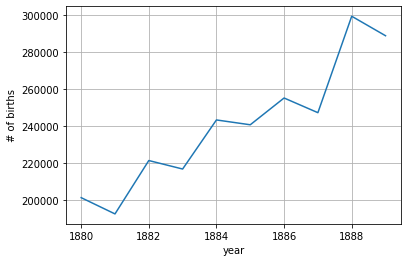

In [ ]:
plt.plot(births_by_year.index, births_by_year.values)
plt.xlabel('year')
plt.ylabel('# of births')
plt.grid()
plt.show()

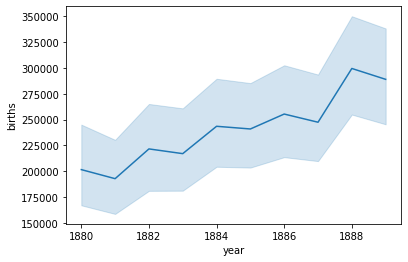

In [ ]:
sns.lineplot(x='year', y='births', data=df, estimator=np.sum)
plt.show()

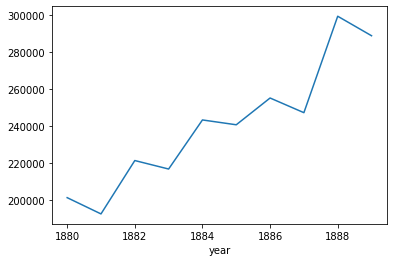

In [ ]:
sns.lineplot(x=births_by_year.index, y=births_by_year.values)
plt.show()

In [ ]:
# 연도별 성별 신생아 수
by_year_gender = df.groupby(by=['year', 'gender'])['births'].sum()
by_year_gender

year  gender
1880  F          90993
      M         110493
1881  F          91955
      M         100748
1882  F         107851
      M         113687
1883  F         112322
      M         104632
1884  F         129021
      M         114445
1885  F         133056
      M         107802
1886  F         144538
      M         110785
1887  F         145983
      M         101412
1888  F         178631
      M         120857
1889  F         178369
      M         110590
Name: births, dtype: int64

In [ ]:
type(by_year_gender)

pandas.core.series.Series

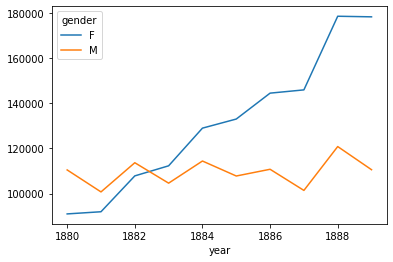

In [ ]:
sns.lineplot(data=by_year_gender, x='year',y=by_year_gender.values, hue='gender')

In [ ]:
# Series 또는 DataFrame의 index(인덱스)를 DataFrame의 컬럼으로 변환.
df_by_year_gender = by_year_gender.reset_index()
df_by_year_gender

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
5,1882,M,113687
6,1883,F,112322
7,1883,M,104632
8,1884,F,129021
9,1884,M,114445


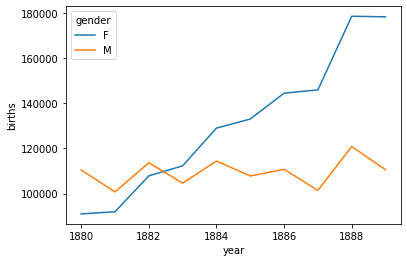

In [ ]:
sns.lineplot(x='year', y='births', hue='gender', data=df_by_year_gender)
plt.show()